In [6]:
%env OMPL_PATH= /home/seiji/Research/ompl/py-bindings
from nonasymptotic.envs import GrayCodeWalls
from nonasymptotic.prm import SimplePRM

import matplotlib.pyplot as plt
import numpy as np

env: OMPL_PATH=/home/seiji/Research/ompl/py-bindings


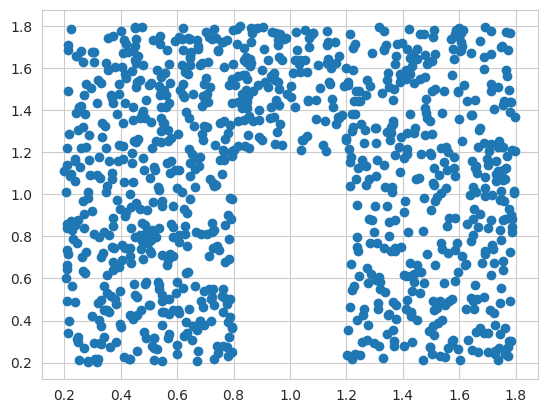

In [7]:
# visualizing 2D env
env_2d = GrayCodeWalls(2, 2, 0.2)
points = np.array([env_2d.sample_from_env() for _ in range(1000)])
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(points[:, 0], points[:, 1])
plt.show()


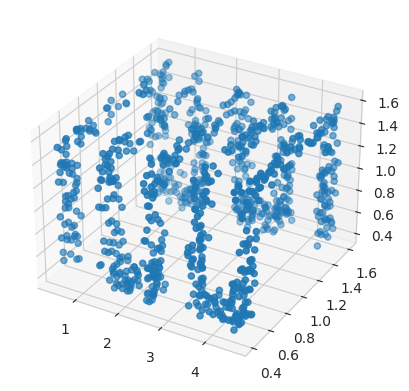

In [8]:
# visualizing 3D env
env_3d = GrayCodeWalls(3, 5, 0.4)
points = np.array([env_3d.sample_from_env() for _ in range(1000)])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()


Tue Dec 19 14:30:02 2023 Building RP forest with 11 trees
Tue Dec 19 14:30:03 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	Stopping threshold met -- exiting after 2 iterations
Tue Dec 19 14:30:03 2023 Worst tree score: 0.99700000
Tue Dec 19 14:30:03 2023 Mean tree score: 0.99918182
Tue Dec 19 14:30:03 2023 Best tree score: 1.00000000
Tue Dec 19 14:30:03 2023 Forward diversification reduced edges from 30000 to 4113
Tue Dec 19 14:30:03 2023 Reverse diversification reduced edges from 4113 to 4113
Tue Dec 19 14:30:03 2023 Degree pruning reduced edges from 3628 to 3628
Tue Dec 19 14:30:03 2023 Resorting data and graph based on tree order
Tue Dec 19 14:30:03 2023 Building and compiling search function


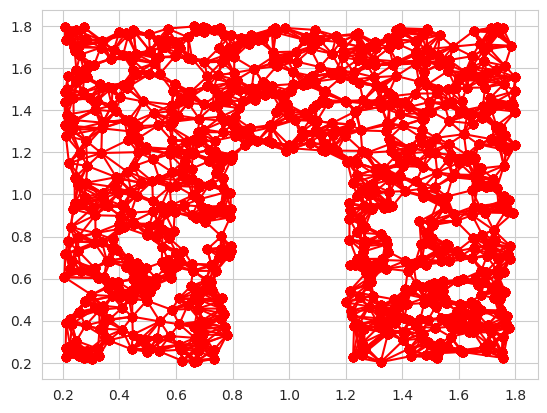

In [17]:
# visualizing a small PRM built on 2d env
prm_env_2d = GrayCodeWalls(2, 2, 0.2)
prm = SimplePRM(1.0, env_2d.is_motion_valid, env_2d.sample_from_env)
prm.grow_to_n_samples(10300)

plt.figure()
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]
    
    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

plt.show()
